In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file_url = '/content/HW1.csv'
data = pd.read_csv(file_url)

data.head()

,X1,X2,X3,Y
0,0.000000,3.440000,0.440000,4.387545
1,0.040404,0.134949,0.888485,2.679650
2,0.080808,0.829899,1.336970,2.968490
3,0.121212,1.524848,1.785455,3.254065
4,0.161616,2.219798,2.233939,3.536375


In [3]:
# Define explanatory variables (X1, X2, X3) and dependent variable (Y)
X1 = data['X1'].values
X2 = data['X2'].values
X3 = data['X3'].values
Y = data['Y'].values

In [4]:
# Function for performing gradient descent on linear regression
def perform_gradient_descent(X, Y, lr=0.05, epochs=1000):
    slope = 0.0
    intercept = 0.0
    n_samples = len(Y)
    loss_history = []

    for _ in range(epochs):
        predictions = intercept + slope * X

        # Compute mean squared error
        error = predictions - Y
        mse = (1 / n_samples) * np.sum(error ** 2)
        loss_history.append(mse)

        # Compute gradients
        grad_slope = (2 / n_samples) * np.sum(error * X)
        grad_intercept = (2 / n_samples) * np.sum(error)

        # Update parameters
        slope -= lr * grad_slope
        intercept -= lr * grad_intercept

    return slope, intercept, loss_history

In [8]:
# Training wrapper
def train_models(X_list, Y, lr=0.05, epochs=1000):
    models = {}
    for i, X in enumerate(X_list, start=1):
        m, b, _ = perform_gradient_descent(X, Y, lr, epochs)
        models[f'X{i}'] = (float(m), float(b))
    return models

# Run training
models = train_models([X1, X2, X3], Y, lr=0.05, epochs=1000)

# Display result
print(models)

{'X1': (-2.038336633229477, 5.9279489169790756), 'X2': (0.5576076103651677, 0.7360604300111252), 'X3': (-0.5204828841600003, 2.8714221036339524)}


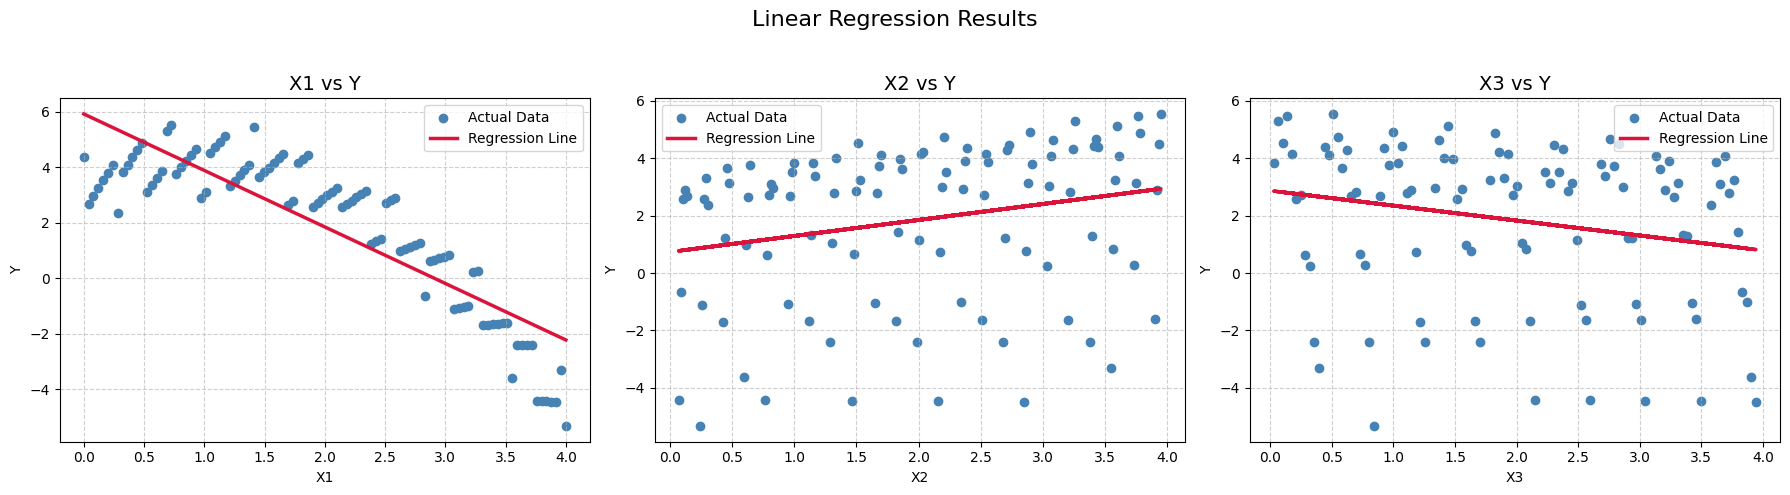

In [10]:
# Plot function
def plot_regression_results(X_list, Y, models, titles):
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    fig.suptitle("Linear Regression Results", fontsize=16)

    for idx, ax in enumerate(axes):
        X = X_list[idx]
        m, b = models[f'X{idx+1}']
        Y_pred = m * X + b

        ax.scatter(X, Y, color='steelblue', label='Actual Data')
        ax.plot(X, Y_pred, color='crimson', linewidth=2.5, label='Regression Line')

        ax.set_title(titles[idx], fontsize=14)
        ax.set_xlabel(f'X{idx+1}')
        ax.set_ylabel('Y')
        ax.grid(True, linestyle='--', alpha=0.6)
        ax.legend()

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Call it here:
titles = ['X1 vs Y', 'X2 vs Y', 'X3 vs Y']
plot_regression_results([X1, X2, X3], Y, models, titles)

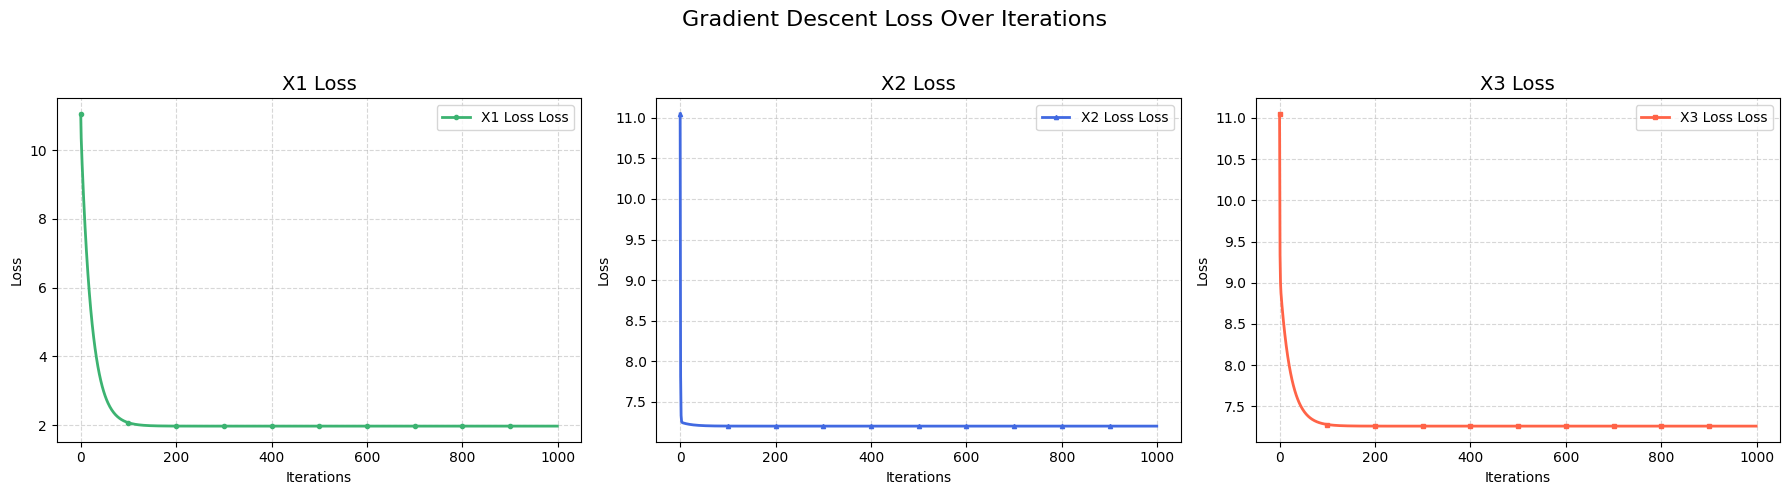

In [12]:
#Plot Loss Curve Showing the Convergence of Gradient Descent for X1, X2, and X3
def plot_loss_curves(loss_lists, labels):
    colors = ['mediumseagreen', 'royalblue', 'tomato']
    markers = ['o', '^', 's']

    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    fig.suptitle("Gradient Descent Loss Over Iterations", fontsize=16)

    for idx, ax in enumerate(axes):
        losses = loss_lists[idx]
        ax.plot(range(len(losses)), losses, color=colors[idx],
                linewidth=2, marker=markers[idx], markersize=3,
                markevery=len(losses)//10, label=f'{labels[idx]} Loss')

        ax.set_title(f'{labels[idx]}', fontsize=14)
        ax.set_xlabel('Iterations')
        ax.set_ylabel('Loss')
        ax.grid(True, linestyle='--', alpha=0.5)
        ax.legend()

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

#Run Gradient Descent for X1, X2, X3
m1, b1, loss1 = perform_gradient_descent(X1, Y)
m2, b2, loss2 = perform_gradient_descent(X2, Y)
m3, b3, loss3 = perform_gradient_descent(X3, Y)

# loss1, loss2, loss3 = ... (from your gradient descent runs)
plot_loss_curves([loss1, loss2, loss3], ['X1 Loss', 'X2 Loss', 'X3 Loss'])

In [16]:
# Compare Final Losses from Single-Feature Regressions
def get_final_losses(loss_list_dict):
    return {key: float(losses[-1]) for key, losses in loss_list_dict.items()}

# After running single-feature regressions earlier
single_feature_losses = {
    'X1': loss1,
    'X2': loss2,
    'X3': loss3
}

final_losses = get_final_losses(single_feature_losses)
print("Final losses for each feature:", final_losses)

Final losses for each feature: {'X1': 1.9699861650811892, 'X2': 7.198732036336083, 'X3': 7.258902249215831}


In [14]:
# Gradient Descent for Multiple Features
def multivariable_gradient_descent(X, Y, learning_rate=0.05, iterations=1000):
    samples, features = X.shape
    theta = np.zeros(features)
    loss_history = []

    for _ in range(iterations):
        predictions = X @ theta
        error = predictions - Y
        mse = (1 / samples) * np.sum(error ** 2)
        loss_history.append(mse)

        gradient = (2 / samples) * (X.T @ error)
        theta -= learning_rate * gradient

    return theta, loss_history


In [15]:
# Create X_multi by adding bias + all Xs as columns
X_multi = np.column_stack((np.ones(len(X1)), X1, X2, X3))  # Shape: (n_samples, 4)

# Train model with all features
multi_theta, multi_loss = multivariable_gradient_descent(X_multi, Y, learning_rate=0.05, iterations=1000)

# Report final model
print("Final theta values for multi-variable model:", multi_theta)


Final theta values for multi-variable model: [ 5.31393577 -2.00368658  0.53260157 -0.26556795]


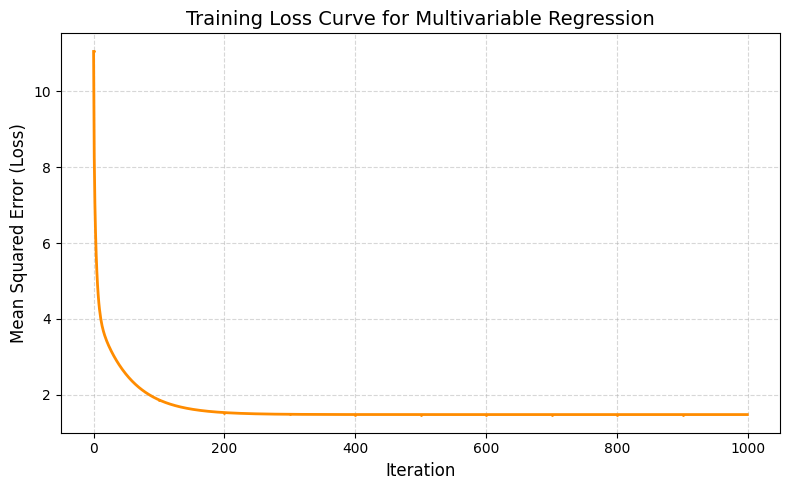

In [18]:
# Plotting loss over iterations for multivariable regression
def plot_multivariable_loss(loss_values):
    plt.figure(figsize=(8, 5))
    plt.plot(loss_values, color='darkorange', linewidth=2, marker='.', markersize=2, markevery=100)
    plt.title('Training Loss Curve for Multivariable Regression', fontsize=14)
    plt.xlabel('Iteration', fontsize=12)
    plt.ylabel('Mean Squared Error (Loss)', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# Train the model with multiple features
theta, loss_multi = multivariable_gradient_descent(X_multi, Y, learning_rate=0.05, iterations=1000)

# Now call the plot function
plot_multivariable_loss(loss_multi)


In [20]:
# Predict Y for new data points using learned theta
def predict_values(theta, input_data):
    input_array = np.array(input_data)
    predictions = input_array @ theta
    return predictions

# Test new values (each row includes 1 for intercept)
test_inputs = [
    [1, 4, 2, 0],
    [1, 0, 1, 5],
    [1, -1, 3, 2]
]

# Get predictions and display them
predicted_y = predict_values(theta, test_inputs)

# Pretty print the output
for i, val in enumerate(predicted_y, start=1):
    print(f"Prediction {i}: y ≈ {val:.4f}")


Prediction 1: y ≈ -1.6356
Prediction 2: y ≈ 4.5187
Prediction 3: y ≈ 8.3843
